In [1]:
import sys
sys.path.append("./subroutines")
from MultiPoint.GAMcalc import *  # Code for calculating vertex functions
import MultiPoint.propagator  # propagator object used to store pre-calculated values
import MultiPoint.wignerD as wd # wigner D object used to store pre-calculated values

## Sets of Ks

The vertex functions have have $\vec{q}$ vectors as inputs.  Here are some some example sets of input vectors.  Each has a magnitude $K$ but there are different ways of arranging them.

In [2]:
def set3Ks(K):
    k1 = np.array([1,0,0])*K
    k2 = np.array([-0.5,0.5*np.sqrt(3),0])*K
    k3 = -k1-k2
    return [k1, k2, k3]

def set4Ks(K):
    k1=np.array([1,0,0])*K
    k2=np.array([-1,0,0])*K
    k3, k4 = -k1, -k2
    return [k1, k2, k3, k4]

In [3]:
def set4Ks1(K):
    k1=np.array([1,0,0])*K
    k2=np.array([1,0,0])*K
    k3, k4 = -k1, -k2
    return [k1, k2, k3, k4]

def set4Ks2(K):
    k1=np.array([1,0,0])*K
    k2=np.array([0.5,0.5*np.sqrt(3),0])*K
    k3, k4 = -k1, -k2
    return [k1, k2, k3, k4]

def set4Ks3(K):
    k1=np.array([1,0,0])*K
    k2=np.array([0,1,0])*K
    k3, k4 = -k1, -k2
    return [k1, k2, k3, k4]

def set4Ks4(K):
    k1=np.array([-1,0,1])/np.sqrt(2)*K
    k2=np.array([-1,0,-1])/np.sqrt(2)*K
    k3=np.array([1,1,0])/np.sqrt(2)*K
    k4=np.array([1,-1,0])/np.sqrt(2)*K
    return [k1, k2, k3, k4]

## Simple examples

First, lets define the arguments of $\Gamma$.

In [4]:
N = 10 # Number of Khun lengths
FA = 0.5 # Fraction A type
K = 10 # Magnitude of K vector
CHI = 0 # Flory huggnes chi parameter

pset=propagator.prop_set(nlam=10) # nlam sepcifies number of angular eigenvalues
wigset = wd.wigner_d_vals()

KS = spinodal(pset, N, FA)
Ks3 = set3Ks(KS)
Ks4 = set4Ks(KS)

$$\Gamma_2(\vec{q})$$

In [5]:
print(gamma2(pset, N, FA, K, CHI))

(12.60483726867446+7.885442756885517e-22j)


$$\Gamma_3(\vec{q}_1,\vec{q}_2,\vec{q}_3)$$

In [6]:
print(gamma3(pset, N, FA, Ks3))

7.703719777548943e-32j


$$\Gamma_3(\vec{q}_1,\vec{q}_2,\vec{q}_3,\vec{q}_4)$$

In [7]:
print(gamma4(pset, wigset, N, FA, Ks4))
# This may take a bit.  Presaved values will make it faster next time.

(14.896108188954166-1.1072126226662434e-13j)


## Gamma2

Now lets plot $\Gamma_2$ over a range of $K$ magnitudes.

In [8]:
N=10
FA=0.5
CHI = 0

pset=propagator.prop_set(nlam=1)
KV = np.logspace(-1,3,100)
gam2 = np.zeros((len(KV), 1),dtype=type(1+1j))
for i, K in enumerate(KV):
    gam2[i] = gamma2(pset, N, FA, K, CHI)

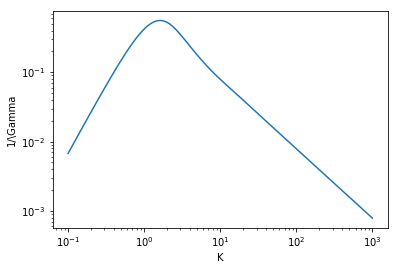

In [9]:
plt.loglog(KV, 1/gam2.real)
plt.xlabel('K')
plt.ylabel('1/\Gamma')
plt.show()

In [10]:
# Now find spinodal

In [11]:
FA = 0.5
NV = np.logspace(-1, 4, 10)
KSV = np.zeros((len(NV)))

for ind, N in enumerate(NV):
    KSV[ind] = spinodal(pset, N, FA)

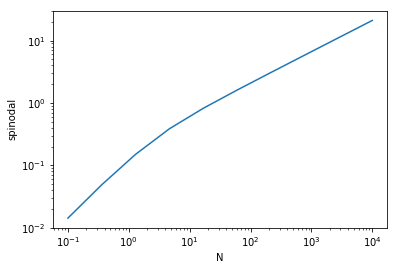

In [12]:
plt.loglog(NV, 1/KSV)
plt.xlabel('N')
plt.ylabel('spinodal')
plt.show()

## Gamma3

In [13]:
FAV = np.linspace(.2, .5, 21)
pset=propagator.prop_set(nlam=10)

N = 1000
GAM3N_N1000 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set3Ks(spinodal(pset, N, FA))
    GAM3N_N1000[ind] = gamma3(pset, N, FA, Ks)*N

N = 100
GAM3N_N100 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set3Ks(spinodal(pset, N, FA))
    GAM3N_N100[ind] = gamma3(pset, N, FA, Ks)*N
    
N = 1
GAM3N_N1 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set3Ks(spinodal(pset, N, FA))
    GAM3N_N1[ind] = gamma3(pset, N, FA, Ks)*N

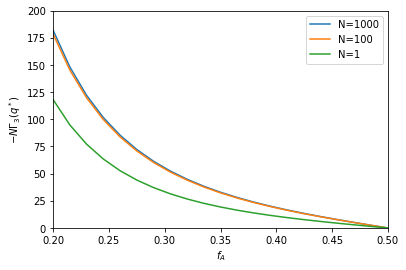

In [14]:
plt.plot(FAV, -GAM3N_N1000.real, label='N=1000')
plt.plot(FAV, -GAM3N_N100.real, label='N=100')
plt.plot(FAV, -GAM3N_N1.real, label='N=1')
plt.xlabel('$f_A$')
plt.ylabel('$-N\Gamma_{3}(q^*)$')
plt.legend(loc=1)
plt.axis([.2,.5,0,200])
plt.show()

## Gamma4

In [ ]:
FAV = np.linspace(.3, .5, 21)
pset=propagator.prop_set(nlam=5)
wigset = wd.wigner_d_vals()

N = 1000
GAM4N_N1000 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    GAM4N_N1000[ind] = gamma4(pset, wigset, N, FA, Ks)*N

N = 100
GAM4N_N100 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    GAM4N_N100[ind] = gamma4(pset, wigset, N, FA, Ks)*N

    
N = 10
GAM4N_N10 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    GAM4N_N10[ind] = gamma4(pset, wigset, N, FA, Ks)*N
    
N = 1
GAM4N_N1 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    GAM4N_N1[ind] = gamma4(pset, wigset, N, FA, Ks)*N

In [ ]:
plt.plot(FAV, GAM4N_N1000.real, label='N=1000')
plt.plot(FAV, GAM4N_N100.real, label='N=100')
plt.plot(FAV, GAM4N_N10.real, label='N=10')
plt.plot(FAV, GAM4N_N1.real, label='N=1')
plt.axis([.3,.5,100,500])
plt.box
plt.legend(loc=1)
plt.show()